# Pràctica 2

In [1]:
# importació de llibreries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime

## > Descripció del joc de dades

In [2]:
# carrego el joc de dades
df = pd.read_csv('supermarket_sales.csv')

* Conjunt de dades escollit: aquest conjunt de dades conté l’historial de venda de tres mesos de tres supermercats diferents.
* Grandària: 17 columnes, 1000 files
* Font: Kaggle
* URL del conjunt de dades: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales
* Columnes:

In [3]:
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

## > Visualització del joc de dades


Dividiré aquest projecte de visualització de dades en tres seccions en funció de les preguntes les quals vull respondre:
* Estudi de negoci:
    * Hi ha alguna mena d'estacionalitat de vendes?
    * Diferències en quant a volum de negoci entre supermercats
    * Satisfacció del client per supermercat
    * Quin és l'import mig de cada venda?
* Estudi de producte:
    * Quins són els productes més comprats en cada supermercat?
        * Hi ha gaires diferències entre supermercats en quant a consum per tipologia de producte?
    * Preu mig en funció de la categoria de producte
    * Quina és la satisfacció del client en funció del producte que compren?
* Estudi de client:
    * Hi ha diferències de consum entre tipus de clients?
    * Hi ha diferències notables entre els mètodes de pagament preferits?
    * Quina és la satisfacció dels clients?

## 1.- Estudi de negoci


Text(0.5, 1.0, 'Evolució de les vendes al llarg del temps')

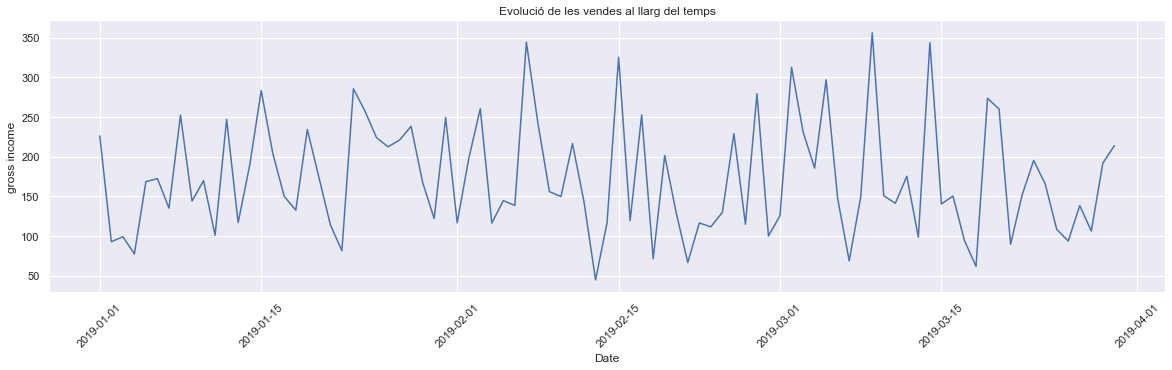

In [20]:
data_vendes=df.groupby('Date')['gross income'].sum()
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(x=data_vendes.index, 
             y=data_vendes.values)
plt.ylabel('gross income')
plt.xticks(rotation=45)
plt.title('Evolució de les vendes al llarg del temps')

Distribució de les vendes per ciutat:


<AxesSubplot:ylabel='City'>

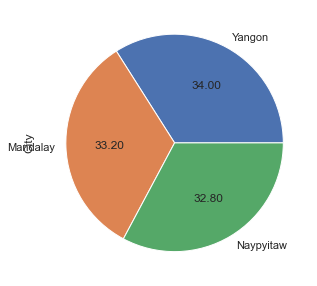

In [5]:
print('Distribució de les vendes per ciutat:')
df['City'].value_counts().plot(kind='pie', autopct='%.2f')

Ingressos del producte en funció de la ciutat:


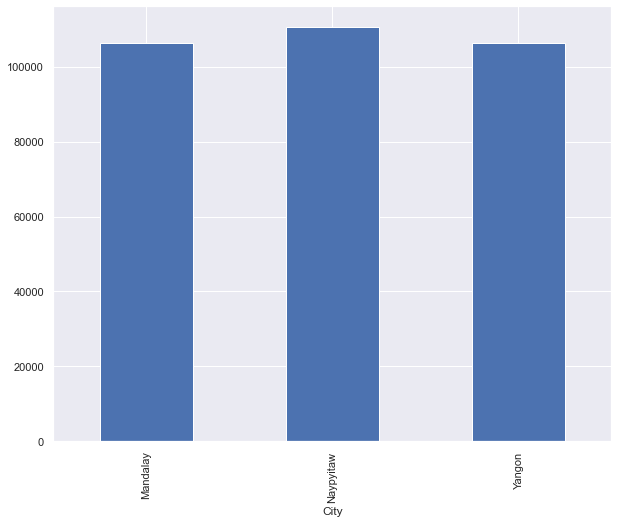

In [6]:
plt.figure(figsize=(10,8)) 
print("Ingressos del producte en funció de la ciutat:")

df2 = df.groupby('City')['Total'].sum()
ax = df2.plot.bar(x='Total', y='City')
plt.show()

Satisfacció del client en funció de la ciutat:


<Figure size 720x576 with 0 Axes>

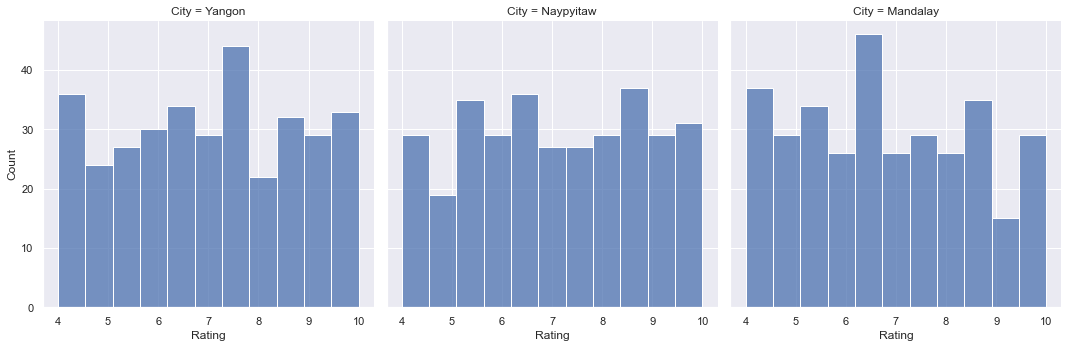

In [7]:
plt.figure(figsize=(10,8)) 
print("Satisfacció del client en funció de la ciutat:")
sns.color_palette("hls", as_cmap=True)
sns.displot(data=df, 
            x='Rating', 
            col='City'
           )


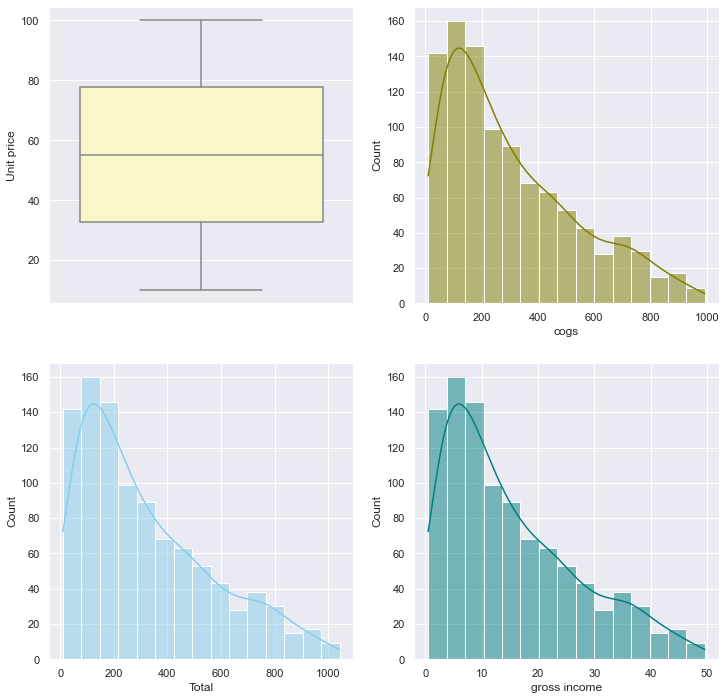

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))

ax = sns.boxplot(
                y="Unit price", 
                data =df, 
                palette= "RdYlBu",
                ax=axs[0, 0]
                )

sns.histplot(data=df, 
             x="Total", 
             kde=True, 
             color="skyblue", 
             ax=axs[1, 0])
sns.histplot(data=df, 
             x="cogs", 
             kde=True, 
             color="olive", 
             ax=axs[0, 1])
sns.histplot(data=df, 
             x="gross income", 
             kde=True, 
             color="teal", 
             ax=axs[1, 1])

plt.show()

## 2.- Estudi de producte


Text(0.5, 1.0, 'Ingressos per categoria de producte')

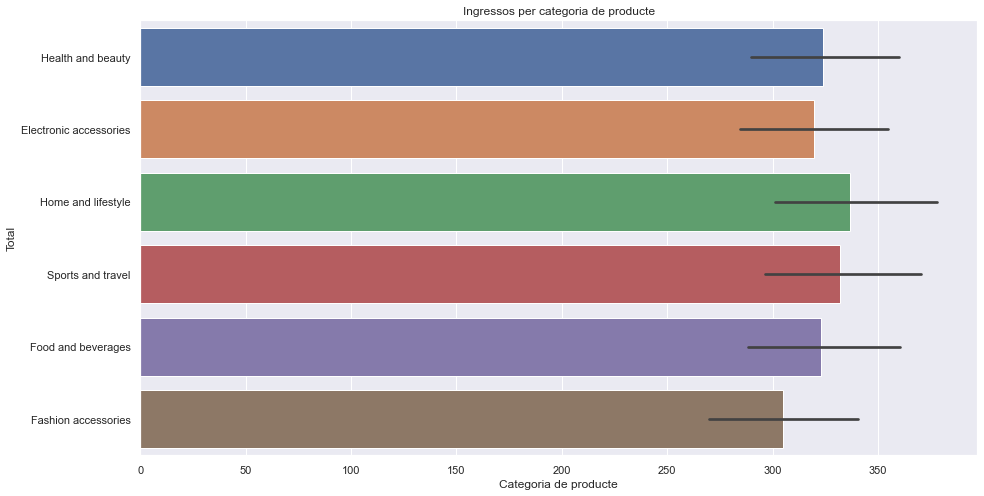

In [9]:
plt.subplots(figsize=(15,8))
sns.barplot(x='Total', 
            y='Product line',  
            data=df
           )
plt.xlabel('Categoria de producte')
plt.ylabel('Total')
plt.title("Ingressos per categoria de producte")

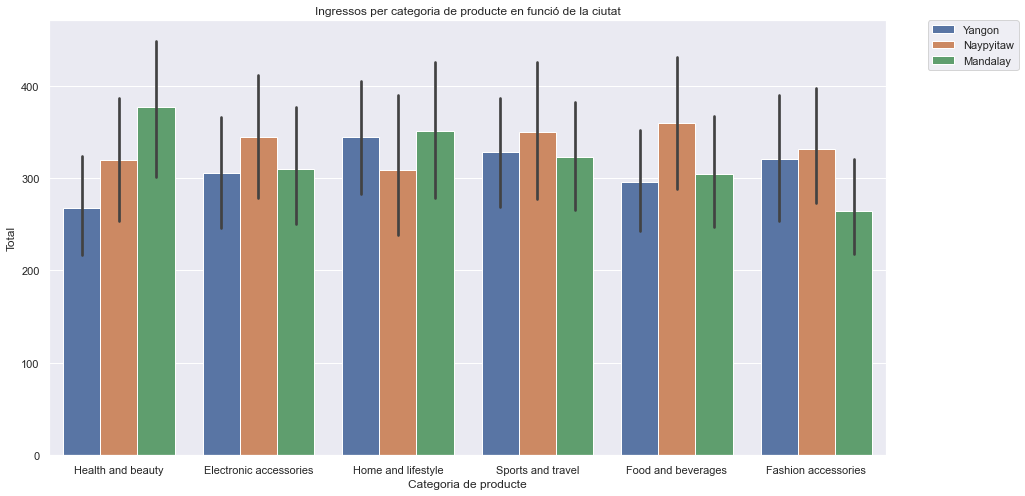

In [10]:
plt.subplots(figsize=(15,8))
sns.barplot(x='Product line', 
            y='Total', 
            hue='City',
            data=df, 
           )
plt.xlabel('Categoria de producte')
plt.ylabel('Total')
plt.title("Ingressos per categoria de producte en funció de la ciutat")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0, 0.5, 'Product Distribution')

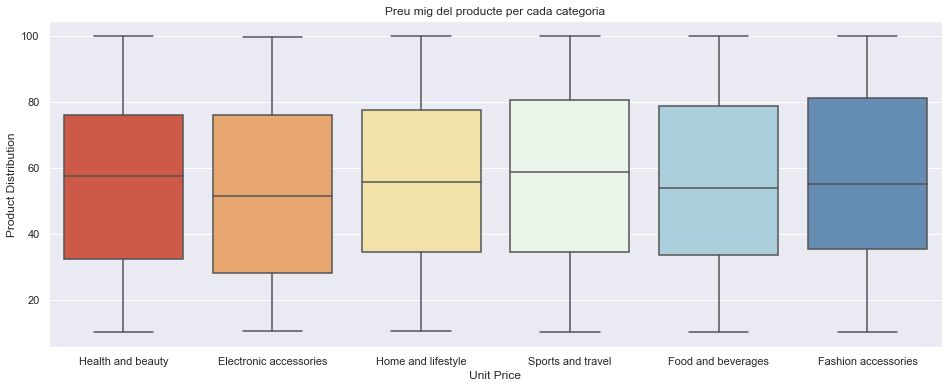

In [11]:
plt.figure(figsize=(16,6)) 
ax = sns.boxplot(x="Product line", 
                 y="Unit price",
                 data =df, 
                 palette= "RdYlBu")

ax.set_title("Preu mig del producte per cada categoria")

ax.set_xlabel(xlabel = "Unit Price", 
              fontsize = 12)
ax.set_ylabel(ylabel = "Product Distribution", 
              fontsize = 12)

Text(0, 0.5, 'Product Distribution')

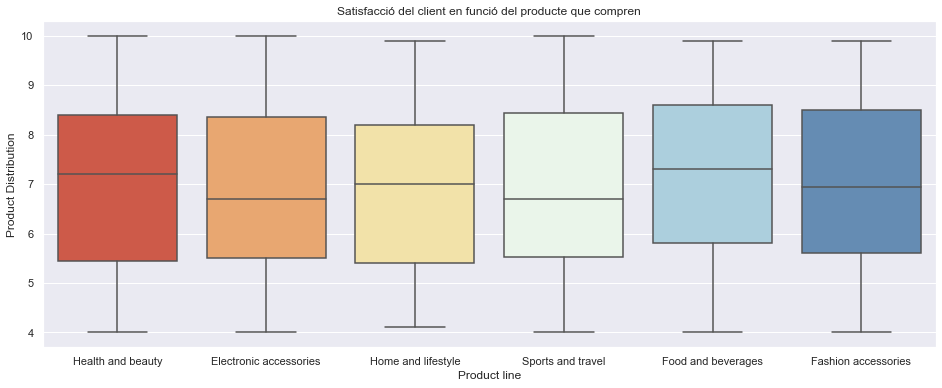

In [12]:
plt.figure(figsize=(16,6)) 
ax = sns.boxplot(x="Product line", 
                 y="Rating",
                 data =df, 
                 palette= "RdYlBu")

ax.set_title("Satisfacció del client en funció del producte que compren")

ax.set_xlabel(xlabel = "Product line", 
              fontsize = 12)
ax.set_ylabel(ylabel = "Product Distribution", 
              fontsize = 12)

## 3.- Estudi de client

In [13]:
# creem una funció que ens compari dues columnes i ens mostri un gràfic de barres

def graficar_dues_columnes(df, 
                            col1, 
                            col2, 
                            legloc='upper right',
                            plt_style = 'gggraficar',
                            color_palette="dark", 
                            sorter=None, 
                            stacked=False,
                            kind = 'bar', 
                            percentage = True,
                            custom_title=None, 
                            minimal=True, 
                            figsize=(14,6), width=0.6):   
    
    # creació de la funció del gràfic
    def graficar(table, 
            legloc='upper right',
            plt_style = 'seaborn-ticks',
            color_palette="dark",
            sorter=None, 
            stacked=False,
            kind = 'bar', 
            percentage = True,
            custom_title=None, 
            minimal=True, 
            figsize=(19,10), 
            width=0.7 ):     
        agrupat = table

        if percentage == True:
            agrupat = np.round(agrupat.divide(agrupat['Total'],axis=0)*100,0)
        try:   
            del agrupat['Total']
        except:
            pass

        if sorter:
            agrupat = agrupat[sorter]

        plt.style.use(plt_style)
        sns.set_palette(sns.color_palette(color_palette))
        ax = agrupat.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
        _ = plt.setp(ax.get_xticklabels(), rotation=0)
        plt.legend(loc=legloc)

        if percentage == True:
          for p in ax.patches:
                ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                             (p.get_x()+p.get_width()/2.,
                                              p.get_height()), ha='center', va='center',
                                            xytext=(0, 10), textcoords='offset points')
        else:
          for p in ax.patches:
                ax.annotate(np.round(p.get_height(),decimals=2),
                                             (p.get_x()+p.get_width()/2.,
                                              p.get_height()), ha='center', va='center',
                                            xytext=(0, 10), textcoords='offset points')
        if minimal == True:
            ax.get_yaxis().set_ticks([])
            plt.xlabel('')
            sns.despine(top=True, right=True, left=True, bottom=False);
        else:
            pass     
        plt.title(custom_title)
    
    
    
    # creació del gràfic
    agrupat = df.groupby([col2,col1]).size().unstack(col2)
    
    agrupat['Total'] = agrupat.sum(axis=1)
   
    graficar(agrupat, 
            legloc=legloc,
            plt_style = plt_style,
            color_palette=color_palette,
            sorter=sorter, 
            stacked=stacked,
            kind = kind, 
            percentage = percentage,
            custom_title=custom_title, 
            minimal=minimal, 
            figsize=figsize, 
            width=width)  

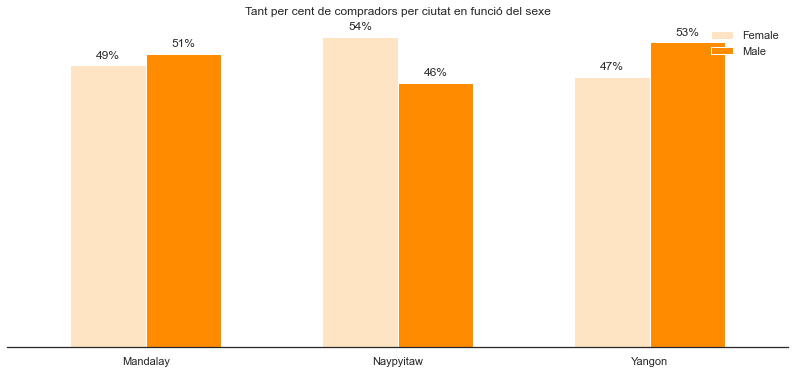

In [14]:
# city i gender
graficar_dues_columnes(df,
                       'City', 
                       'Gender', 
                       color_palette=('bisque','darkorange'),
                       plt_style = 'seaborn-ticks', 
                       custom_title='Tant per cent de compradors per ciutat en funció del sexe')

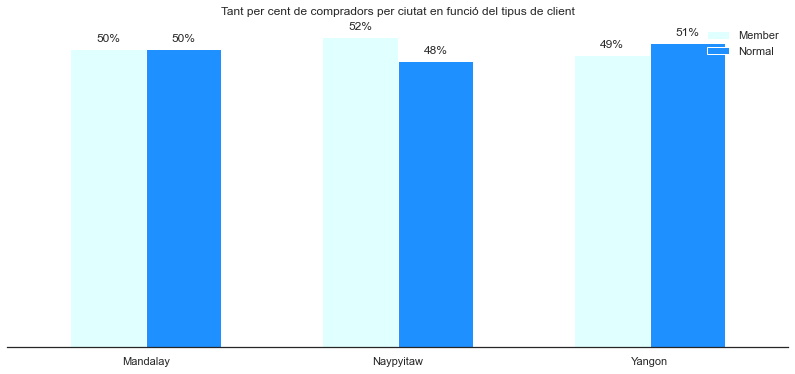

In [15]:
# city i customer type
graficar_dues_columnes(df,
                       'City', 
                       'Customer type', 
                       color_palette=('lightcyan','dodgerblue'),
                       plt_style = 'seaborn-ticks', 
                       custom_title='Tant per cent de compradors per ciutat en funció del tipus de client')

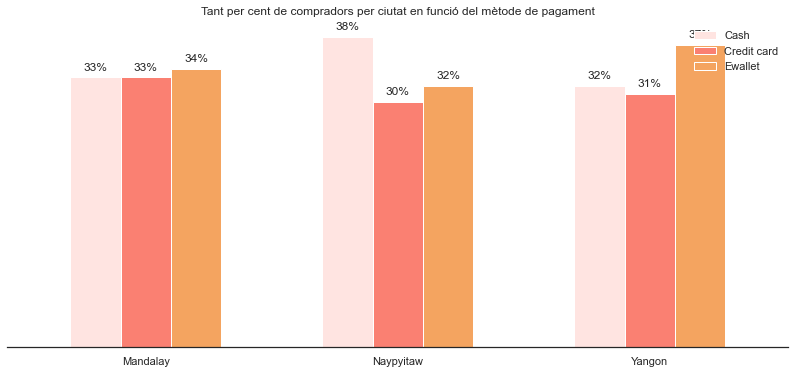

In [21]:
# city i payment
graficar_dues_columnes(df,
                       'City', 
                       'Payment', 
                       color_palette=('mistyrose','salmon','sandybrown'),
                       plt_style = 'seaborn-ticks', 
                       custom_title='Tant per cent de compradors per ciutat en funció del mètode de pagament')

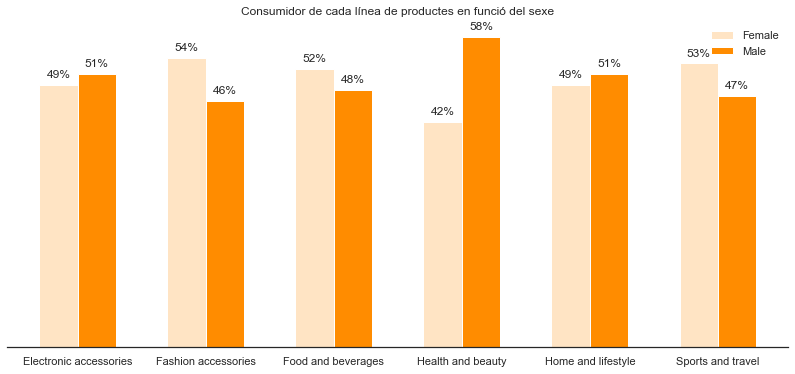

In [17]:
# product line i gender
graficar_dues_columnes(df,
                       'Product line', 
                       'Gender', 
                       color_palette=('bisque','darkorange'),
                       plt_style = 'seaborn-ticks', 
                       custom_title='Consumidor de cada línea de productes en funció del sexe')

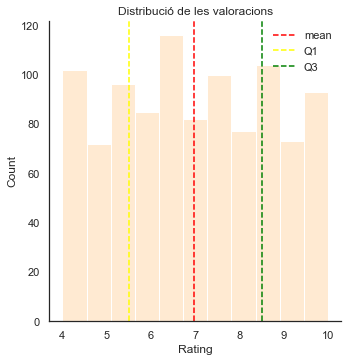

In [18]:
sns.displot(df['Rating'])

plt.axvline(df['Rating'].mean(),
            c='red', 
            ls='--' , 
            label='mean')
plt.axvline(np.percentile(df['Rating'],25),
            c='yellow', 
            ls='--', 
            label='Q1')
plt.axvline(np.percentile(df['Rating'],75),
            c='green', 
            ls='--', 
            label='Q3')
plt.title('Distribució de les valoracions')
plt.legend(loc='upper right')
plt.show()

Distribució de les valoracions en funció del sexe


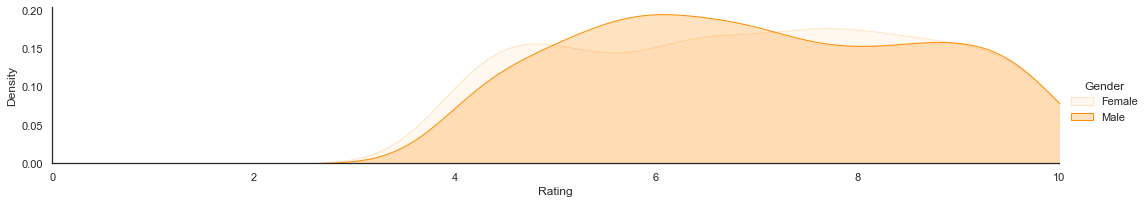

In [19]:
print("Distribució de les valoracions en funció del sexe")
as_fig = sns.FacetGrid(df,
                       hue='Gender',
                       aspect=5,
#                       color_palette=('lightcyan','dodgerblue')
                      )
as_fig.map(sns.kdeplot,
           'Rating',
           shade=True)

oldest = df['Rating'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

# Conclusions

Conclusions de l'**estudi de negoci**:
* No es detecta una forta estacionalitat més enllà d'un parell de dies els quals les vendes van ser menors del compte
* No hi ha una gran diferència entre les vendes en transaccions ni en ingressos entre els diferents supermercats
* La satisfacció dels clients sol ser més alta al supermercat de la ciutat de Mandalay
* El tíquet mig s'aproxima als 55USD, estant la majoria de les vendes entre els 35 i els 78USD

Conclusions de l'**estudi de producte**:
* No hi ha una gran diferència d'ingressos entre categories. Tot i així, la categoria que més ingressos genera és Home and lifestyle i la que menys Fashion accessories
* Podem detectar petits patrons de consum en funció de la ciutat com ara que a Mandalay es consumeix molt més producte de Health and beauty que a altres ciutats i que Mandalay és la ciutat en la que menys es consumeix productes d'aquesta categoria
* Els productes més cars es troben a la categoria de Sports and travel i els més barats a Electronic accessories
* Els clients més satisfets són els que compren productes de Food and beverages i els que menys els que compren productes de Electronic accessories

Conclusions de l'**estudi del client**:
* No hi ha grans diferències entre els clients si ho separem per sexe
* De mitja, la meitat dels clients són Normal i la meitat són Member, sense haver grans diferències entre supermercats
* Passa quelcom similar amb els mètodes de pagament, estan bastant igualats. Sí que és cert que es pot veure una preferència per pagar en efectiu a Naypytaw i una preferència per pagar Ewallet a Yangon
* Tan sols trobem diferències significatives en quant a consum per categoria i sexe en Food and beberages i en Health and beauty
* Tenen una valoracio mitja de 7, estant més del 75% de les valoracions per sobre del 5,5
* Hi ha més valoracions negatives (<5) de dones
